# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

### Импортируем данные

In [1]:
import pandas as pd # Импортируем Pandas
import matplotlib.pyplot as plt # Импортируем matplotlib

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # Сохраняем информацию файла в датафрейме data

pd.set_option('display.max_columns', 50) 
    
data.head() # Выводим шапку датафрейма, дабы ознакомиться с данными

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Изучаем общую информацию о данных

In [3]:
data.info() # Выводим информацию о датафрейме, чтобы изучить типы данных и пропуски значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Строим гистограммы

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

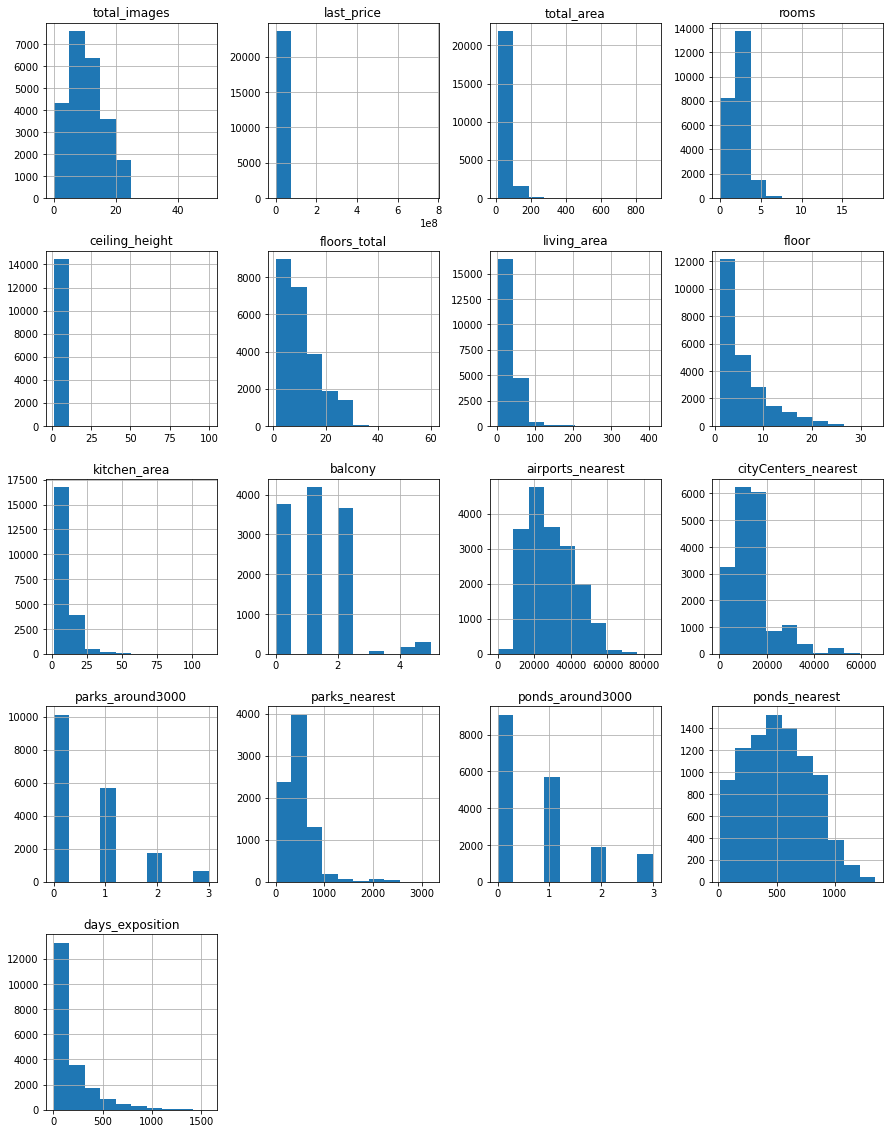

In [4]:
data.hist(figsize=(15, 20)) # Строим общую гистограмму для всех столбцов таблицы

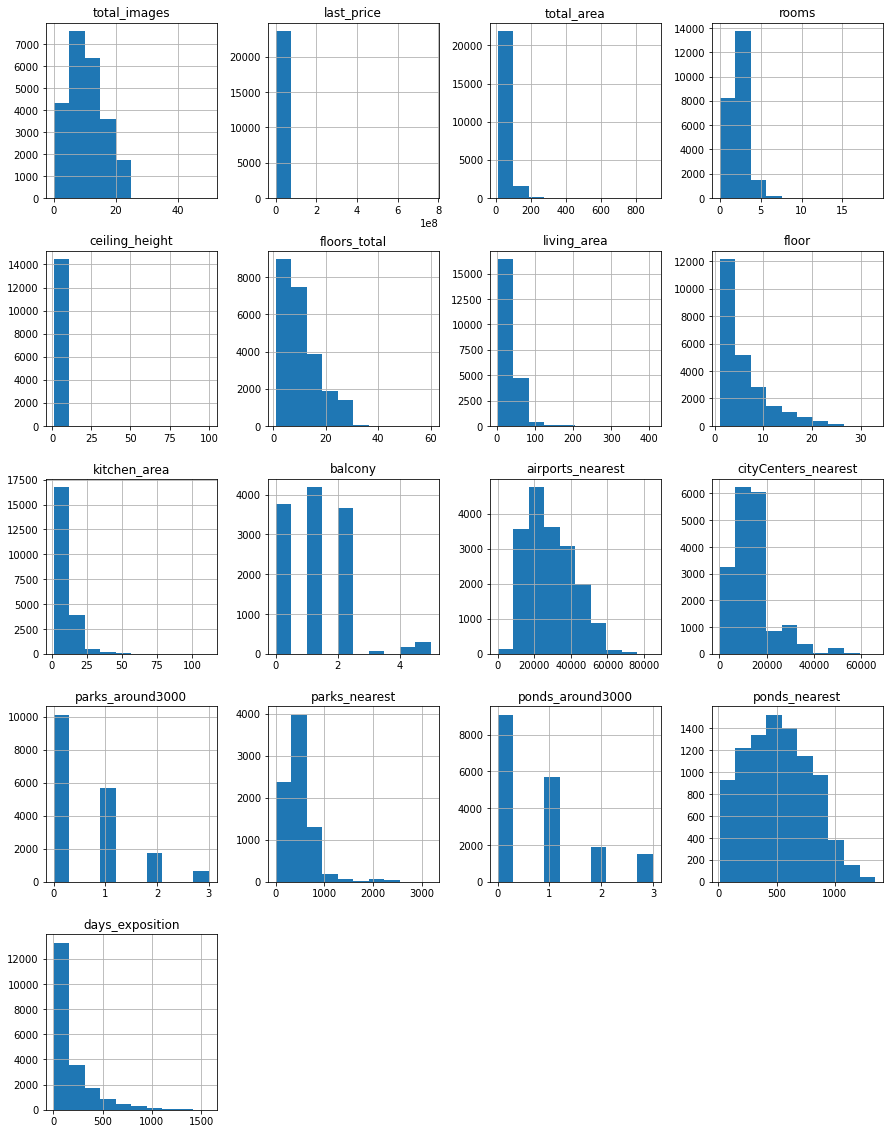

In [5]:
# Код ревьюера

data.hist(figsize=(15, 20))
None

1. first_day_exposition - имеет тип 'object', а должен быть 'datetime'
2. ceiling_height - пропуски значений
3. floors_total - есть пропуски значений, тип float, хотя должен быть int, т.к. не может быть дробного числа этажей
4. is_apartment - есть пропуски значений, тип должен быть булевым
5. living_area - есть пропуски значений
6. kitchen_area - есть пропуски значений
7. balcony - есть пропуски значений
8. locality_name - есть пропуски значений
9. airports_nearest - есть пропуски значений
10. cityCenters_nearest - есть пропуски значений
11. parks_around3000 - есть пропуски значений, тип должен быть int
12. parks_nearest - есть пропуски значений
13. ponds_around3000 - есть пропуски значений, тип должен быть int
14. ponds_nearest - есть пропуски значений
15. days_exposition - есть пропуски значений? тип должен быть int

Наименования столбцов имеют вполне корректный вид. Разве что "cityCenters_nearest" можно было бы привести к "city_centers_nearest", но это не столь серьезный недочет. Оставим так как есть.

## Предобработка данных

### Устраняем пропуски

In [6]:
# Заменяю пропущенные значения и изменяю тип данных

# Пропуски в кол-ве этажей не имеют никакой закономерности и их не так много.
# Оставим их, как есть. Перевести в int с nan мы не сможем.
data['floors_total'].value_counts()
data[data['floors_total'].isna()]

# Площадь кухни имеет не так много пропусков. Связаны они могут быть с ее отсутствием, как вариант
# Но нужно проверять отдельно.
data['kitchen_area'].describe()

# Пропуски в балконах связаны, скорее всего, с их отсутствием, поэтому меняем их на 0
data['balcony'].value_counts()
data['balcony'] = data['balcony'].fillna(0)

# Не ясна причина пропуска в наименовании населенного пункта. Закономерность выявить трудно.
# Поэтому оставим пропуски как они есть. Тем более, их тоже не так уж и много.
data['locality_name'].value_counts()
data['locality_name'].unique()

# Для living_area можно было бы сделать выборку и заполнить пропущенные значения средним от этой выборки
# Но я не уверен, что это будет правильно, т.к. у каждой квартиры разное кол-во комнат, разный тип, как "студия", к примеру
# И это может исказить данные.
data['living_area'].value_counts()
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

### Меняем типы данных

In [7]:
# Переведем в формат datetime, откинем часы, минуты и секунды, т.к. они не указаны в датафрейме.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

# Апартаменты заполним False. Приведем к типу bool.
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')

# Приводим к типу int
data['balcony'] = data['balcony'].astype('int')

# Заменим пропуски в days_exposition и приведем к типу int.
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [8]:
# Эти столбы тоже не будем трогать, т.к. отсутствие значений в них может быть связано с тем, что
# Их либо не указали при введении данных, либо поблизости нет ни одного парка, аэропорта или водоема.
# Менее ясно обстоят дела с растоянием до центра, но пока не будем чем-нибудь заполнять.

# data['airports_nearest'].value_counts()
# data['cityCenters_nearest'].value_counts()
# data['parks_around3000'].value_counts()
# data['parks_nearest'].value_counts()
# data['ponds_around3000'].value_counts()

In [9]:
# Смотрим на аномальные значения высоты потолков.
data['ceiling_height'].sort_values().unique()

# Допустим, что потолки высотой до 10м считаем нормой. Тогда остальные значения введены, скорее всего, ошибочно
# Пропущена точка при введеннии данных.
data = data.replace({'ceiling_height':{14.:10, 20.:2.0, 22.6:2.26, 24:2.4, 25:2.5, 26:2.6, 27.:2.7, 27.5:2.7, 32:3.2, 100:10.0,}})

# Мне слабо верится, что потолки бывают высотой 1м или 1.2, поэтому приравняем их к 1.75. Таких потолков я тоже не видел,
# Но уже больше похоже на правду
data = data.replace({'ceiling_height':{1.:1.75, 1.2:1.75}})

# Стандартный потолок высотой 2.75. Заполним пропуски медианой, т.к. она ушла не далеко от этого значения.
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

### Изучаем уникальные значения

In [10]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [11]:
data['locality_name'].duplicated().sum() # Проверяем кол-во явных дубликатов
# Убирать мы их не будем, т.к. одно и то же значение может повторяться в датафрейме несколько раз

23334

In [12]:
data['locality_name'].unique().shape[0] # Смотрим количество уникальных значений

365

In [13]:
# Заменяем "городской поселок" на "поселок городского типа"
data['locality_name'] = data['locality_name'].str.replace("городской посёлок", "поселок городского типа")

# Поменяем все "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

# Проверяем количество уникальных значений еще раз
data['locality_name'].unique().shape[0]

326

После этого я решил проверить неявные дубликаты по примеру из описания проекта, где сказано следующее: "например, «поселок Рябово» и «поселок городского типа Рябово»"
Уточнив эту информацию, приходим к выводу, что это все-таки два разных населенных пункта, один из которых находится в Тосненском районе Ленинградской области, а другой Выборгском районе все той же Ленинградской области. То есть, дубликатами данный случай не является.

На основании этого было принято решение не искать остальные подобные дубликаты, т.к. проверять, существуют ли те или иные населенные пункты - слишком долго.

## Посчитайте и добавьте в таблицу новые столбцы

In [14]:
# Произведем расчет цены за квадратный метр:
data['price_per_square_meter'] = data['last_price'] / data['total_area']

# Переведем в тип int, чтобы удобнее было воспринимать информацию:
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

# Добавим день публикации объявления:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

# Месяц:
data['month_exposition'] = data['first_day_exposition'].dt.month

# Год:
data['year_exposition'] = data['first_day_exposition'].dt.year

# Создадим функцию для категоризации типа этажа:
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

# Вызываем функцию:
data['floor_type'] = data.apply(floor_type, axis = 1)

# Создадим столбец с расстоянием до центра города в км
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000

## Проведите исследовательский анализ данных

### Изучаем параметры

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

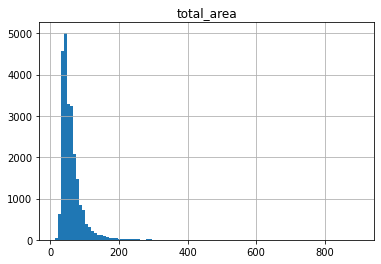

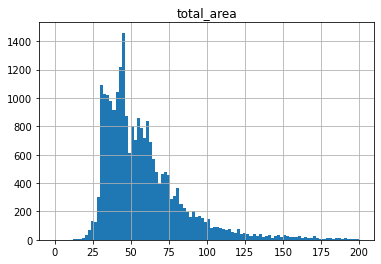

In [15]:
data.hist('total_area', bins = 100)
data.hist('total_area', bins = 100, range = (0, 200))
data['total_area'].describe()

Вывод: видим, что основная часть объектов имеет площадь от 30 до 70 кв.м.
Редко можно встретить значения менее 25 и гистограмма практически сходит на нет после 125 кв.м.

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

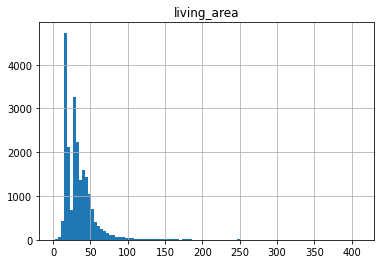

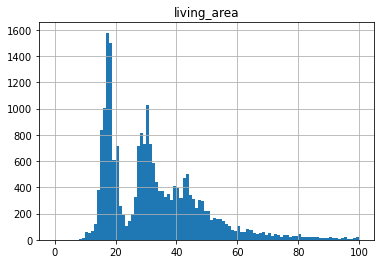

In [16]:
data.hist('living_area', bins = 100)
data.hist('living_area', bins = 100, range = (0, 100))
data['living_area'].describe()

Вывод: в основном объекты имеют от 18 до 42 кв.м. жилой площади. Имеем при этом два резких скачка на 18 и 30.
Думаю, это может быть связано с типовой застройкой, где примерно одинаковая планировка от города к городу, дающая данные резкие подъемы частоты.

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

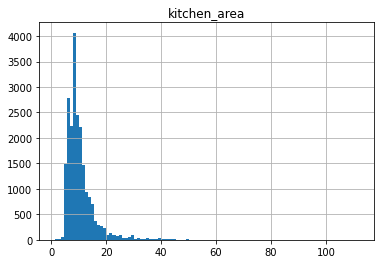

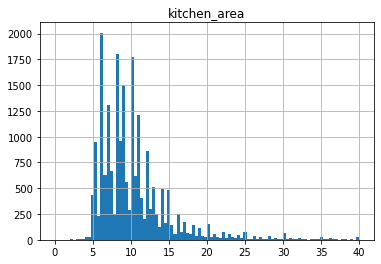

In [17]:
data.hist('kitchen_area', bins = 100)
data.hist('kitchen_area', bins = 100, range = (0, 40))
data['kitchen_area'].describe()

Вывод: основная доля площади кухни находится от 7 до 12 кв.м.
Встречаются, конечно, и совсем крохотные размером менее 5, и целые столовые более 40, что редкость.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

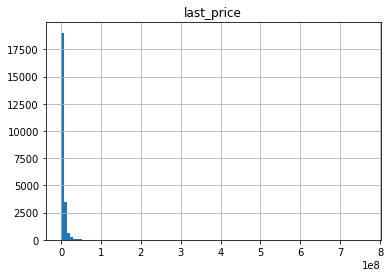

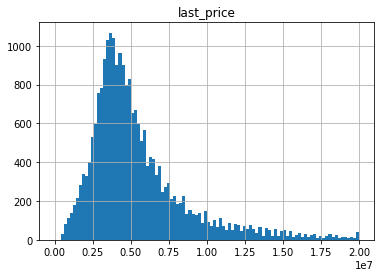

In [18]:
data.hist('last_price', bins = 100)
data.hist('last_price', bins = 100, range = (0, 2e+07))
data['last_price'].describe()

Вывод: видим медиану в 4.5 миллиона и среднее в 6.5
При этом основная доля недвижимости расположилась в ценовой категории от 250 000 до 750 000.
Связано это с тем, что цены в крупных городах сильно выше, нежели если сравнивать с остальными населенными пунктами страны, поэтому среднее значение смещается за несколько миллионов, хотя основная часть не дотягивает и до одного.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

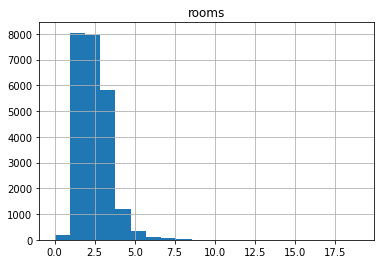

In [19]:
data.hist('rooms', bins = 20)
data['rooms'].describe()

Вывод: основной диапазон лежит от однокомнатных до трехкомнатных объектов. Недвижимости с количеством комнат более 5 практически не наблюдается, хотя есть и аномально большой показатель в 19.
Выбросом его считать вряд ли можно, учитывая, что в выборку мог попасть и целый особняк. Как мы видели на предыдущих гистограммах, есть значения в 900 кв.м. общей площади. Думаю, это он.

count    23699.000000
mean         2.698605
std          0.246645
min          1.750000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

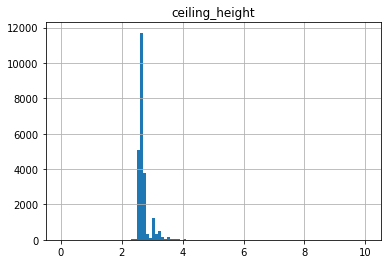

In [20]:
data.hist('ceiling_height', bins = 100, range=(0,10))
data['ceiling_height'].describe()

Вывод: значение типичной высоты потолка, если поискать его в интернете, равняется 2.7, что и подтверждает наша выборка, имея основной диапазон в 2.6-2.7 метра.

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

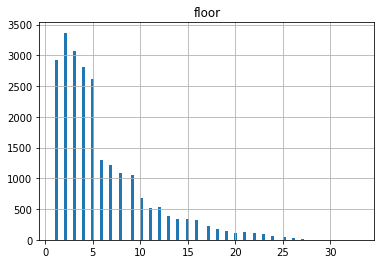

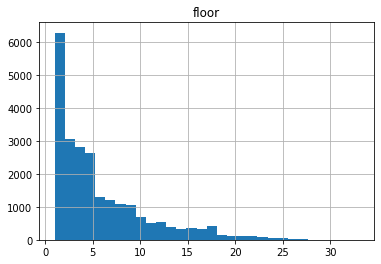

In [21]:
data.hist('floor', bins=100)
data.hist('floor', bins=30)
data['floor'].describe()

Вывод: можно заметить, что в основном распространены квартиры, расположеные до пятого этажа, и резкий скачок на одноэтажных объектах. Связано это, скорее всего, с частными домами, коих много, а резкий спад количества квартир после 5 этажа обусловлен типичной застройкой панельных пятиэтажек по всей стране. В основном были распространены 5 и 9 этажные здания.

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

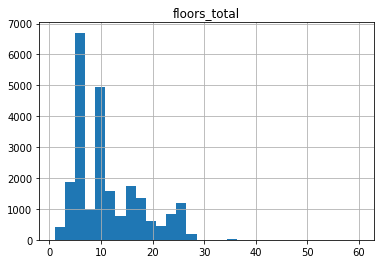

In [22]:
data.hist('floors_total', bins=30)
data['floors_total'].describe()

Вывод: подтверждается теория о пятиэтажках из прошлого параметра. Их больше всего, как и 9-этажных домов.

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

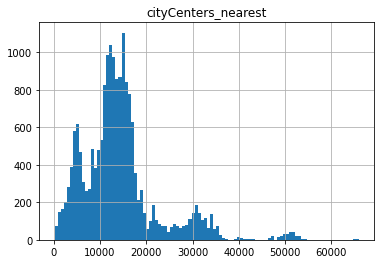

In [23]:
data.hist('cityCenters_nearest', bins=100)
data['cityCenters_nearest'].describe()

Вывод: основная часть недвижимости удалена от центра на 5-15 км. Медиана и среднее пракически одинаковые и показывают нам значение в 13-14 км.

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

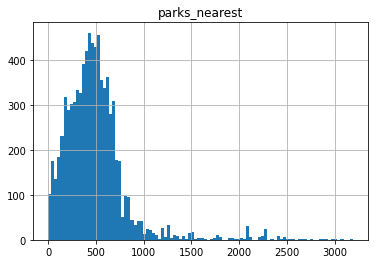

In [24]:
data.hist('parks_nearest', bins=100)
data['parks_nearest'].describe()

Вывод: в основном дома расположены в пешей доступности от парка - медиана и среднее менее километра.

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

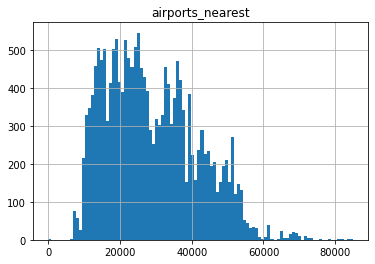

In [25]:
data.hist('airports_nearest', bins=100)
data['airports_nearest'].describe()

Вывод: а вот аэропорты располагается в основном сильно дальше - 25-30 км. Обусловен данный факт тем, что в городе обычно один, край два, аэропорта и расположены они специально на большом расстоянии, чтобы не мешать шумом взлета и посадки, а так же прогонкой двигателей самолетов и т.д. (я по образованию авиационный инженер, поэтому могу смело заявить, что жить рядом с подобным объектом - такое себе удовольствие)

In [26]:
data[data['airports_nearest'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60,201729,6,9,2018,другой,22.801


В ходе данного изучания параметров обнаруживается один жилой объект, который имеет 34.7 кв.м. жилой площади за 7 млн. и находится прямо в аэропорту, при этом заявляют, что удален он от центра на почти 23 км.
Удаление от центра на правду похоже, т.к. среднее значение расстояния до аэропорта у нас 25-30.
Я бы предположил, что такое может быть из-за комнат отдыха для сотрудников аэропорта, в которых фактически можно жить, но вряд ли бы их тогда продавали. Неясно, считать ли это выбросом.

count    23699.000000
mean         6.400101
std          3.491561
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

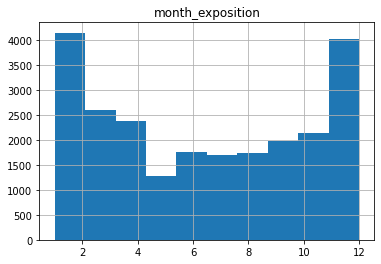

In [27]:
data.hist('month_exposition', bins=10)
data['month_exposition'].describe()

Вывод: замечены два скачка продаж в декабре и январе, откуда можно сделать вывод, что недвижимость почему-то лучше продается зимой, нежели летом. С чем это связано - сказать трудно. Тут, думаю, нужно проводить отдельное исследование.
Отчасти, могу предположить, спад летом вызван временем отпуска у большинства людей, отчего может идти снижение числа продаж. Людям попросту не до этого. Ну и изъянов на частных домах зимой из-за снега может быть заметно в разы меньше, чем летом, когда ничего не мешает внешнему осмотру дома, отчего проще совершить продажу.

### Изучаем, как быстро продавались квартиры

In [28]:
data['days_exposition'].value_counts().unique()

array([3181,  880,  538,  234,  208,  204,  176,  158,  152,  148,  143,
        139,  138,  135,  129,  128,  127,  126,  125,  124,  122,  120,
        116,  115,  112,  110,  109,  108,  107,  106,  104,  101,  100,
         99,   96,   93,   91,   90,   89,   88,   86,   84,   83,   81,
         79,   78,   77,   76,   75,   74,   73,   72,   71,   70,   69,
         68,   67,   66,   65,   64,   62,   61,   60,   59,   58,   57,
         56,   55,   54,   53,   52,   51,   50,   49,   48,   47,   46,
         45,   44,   43,   42,   41,   40,   39,   38,   36,   35,   34,
         33,   32,   31,   30,   29,   28,   27,   26,   25,   24,   23,
         22,   21,   20,   19,   18,   17,   16,   15,   14,   13,   12,
         11,   10,    9,    8,    7,    6,    5,    4,    3,    2,    1])

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

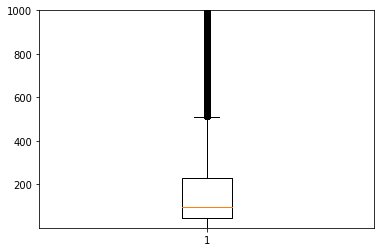

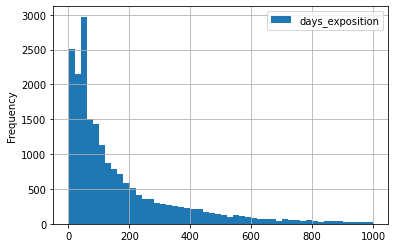

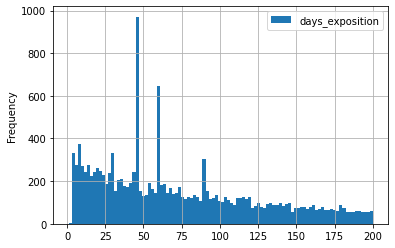

In [29]:
# Строим диаграмму размаха, не учитывая заполненные нами пропуски нулевыми значениями.
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

# Строим гистограмму от 1 до 1000, т.к. основные значения лежат в этом диапазоне. Считаю, что 3000 - выброс и с данным размахом
# Гистограмма станет совсем неинформативной.
data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (1,1000))

# Основные значения лежат в диапазоне от 1 до 200, что подтверждает среднее и медиана.
# Строим более детальную гистограмму, чтобы взглянуть на распределение поближе.
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

# Применяем метод describe, чтобы увидеть среднее и медиану.
data[data['days_exposition']!=0]['days_exposition'].describe()

Вывод: среднее находится на отметке 180, медиана равняется 95. Некоторая недвижимость сдается годами, но основная масса успевает сдаться в первые 200 дней.
На более детальной гистограмме видим аномальные пики на, примерно, 45, 60 и ~90 дней. Думаю, необходимо уточнить у Яндекс.Недвижимости, чем могут быть обоснованы пики именно на этих числах, чтобы можно было делать вывод, является ли это выбросом или несет под собой другую скрытую причину.

Посмотрим на межквартильный размах. Ссылаясь на все тот же метод describe, можно говорить, что он находится в диапазоне от 45 до 232 дней. Диаграмма размаха показывает, что выбросы находятся от ~550.
То есть, интерпретируя, могу сказать, что нормальные значения находятся в диапазоне от 1 до 550 дней. Все, что вне этого диапазона - выброс.

То есть, быстрыми продажами можно считать те, что осуществились до первого пика, а необычно долгими все, что выходят за значение в 550 дней.


### Какие факторы больше всего влияют на общую (полную) стоимость объекта

0.3019601438779257

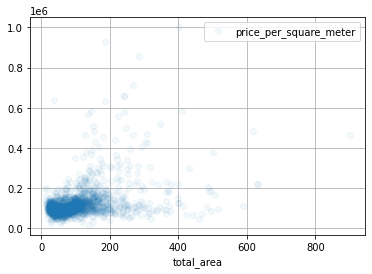

In [30]:
# Посмотрим зависимость стоимость кв.м. от общей площади
# Для этого создадим сводную таблицу, поместив туда нужные нам значения и создадим по ним график:
data.pivot_table(index = 'total_area',
                 values = 'price_per_square_meter',
                 aggfunc = ['median']).plot(y = 'median', style = 'o', grid = True, alpha=0.05)

# Также посмотрим на коэффициент корреляции Пирсона:
data['total_area'].corr(data['price_per_square_meter'])

Вывод:
Значениям 0.2, 0.4 и т.д. соответствуют цены в 200 000, 400 000 и т.д.
Ссылаясь на корреляцию, могу заявить, что зависимость выявляется слабая. С увеличением площади стоимость растет совсем незначительно.
Выявляется пара аномальных значений, где за ~900 кв.м. мы имеем стоимость в 500 000 и аномально высокая цена в
1 000 000 при 200-400 кв.м.

0.3019601438779257

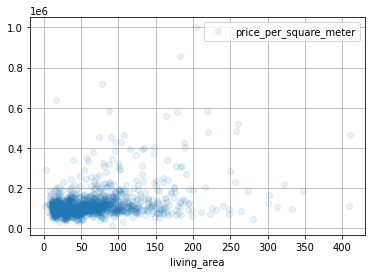

In [31]:
# Посмотрим зависимость стоимость кв.м. от жилой площади
data.pivot_table(index = 'living_area',
                 values = 'price_per_square_meter',
                 aggfunc = ['median']).plot(y = 'median', style = 'o', grid = True, alpha=0.1)

data['total_area'].corr(data['price_per_square_meter'])

Вывод: замечаем очень слабую корреляцию, которая говорит нам о том, что с увеличением площади совсем чуть-чуть увеличивается цена.

0.3974934510795303

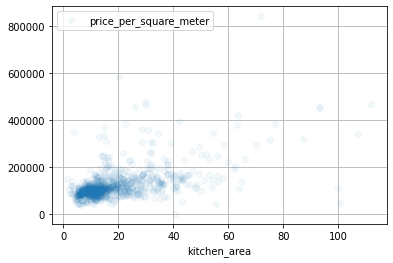

In [32]:
# Посмотрим зависимость стоимость кв.м. от площади кухни
data.pivot_table(index = 'kitchen_area',
                 values = 'price_per_square_meter',
                 aggfunc = ['median']).plot(y = 'median', style = 'o', grid = True, alpha=0.05)

data['kitchen_area'].corr(data['price_per_square_meter'])

Вывод: то же самое подтверждает нам и площадь кухни, хоть и зависимость немного больше.

0.05541949967059211

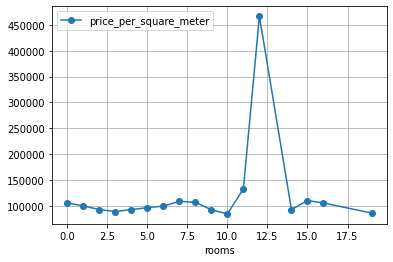

In [33]:
# Посмотрим зависимость стоимость кв.м. от количества комнат
data.pivot_table(index = 'rooms',
                 values = 'price_per_square_meter',
                 aggfunc = ['median']).plot(y = 'median', style = '-o', grid = True)

data['rooms'].corr(data['price_per_square_meter'])

Вывод: видим выброс в очень дорогом объекте, имеющем 12 комнат. Проведем исследование без его учета, чтобы было более понятно распределение.

<AxesSubplot:xlabel='rooms'>

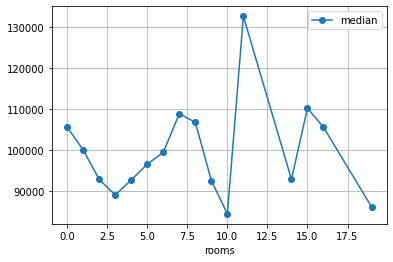

In [34]:
data_rooms = data.pivot_table(index = 'rooms',
                 values = 'price_per_square_meter',
                 aggfunc = ['median'])
data_rooms.columns = ['median']
data_rooms.query('median < 450000').plot(y = 'median', style = '-o', grid = True)

Вывод: почему-то чем меньше количество комнат к 3, тем меньше цена. Как мы помним основная часть недвижимости имеет как раз-таки от 1 до 3 комнат. И намного реже более пяти. В больших (более, чем пятикомнатные) домах сложно найти закономерность распределения цен. Думаю, объекты там носят сликом индивидуальный характер и поэтому мы можем найти очень дорогую 6 комнатный дом, к примеру, но при этом дешевые 10 и 14 комнатные. Все зависит, думаю, от множества других факторов, а не конкретно от количества комнат в данном случае.

Я не строитель, поэтому мне сложно предположить, почему трехкомнатные квартиры обваливают график с ценами вниз, но, немного поискав информацию в интернете, обнаружил цитату: "трешка может быть дешевле из-за неудачного расположения комнат". Возможно, связано с этим, но утверждать сложно.

,count,median
floor_type,,
первый,2917,81223
последний,3336,87777


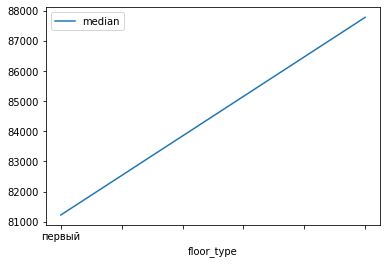

In [35]:
data_foolr_type = data.query('floor_type != "другой"').pivot_table(index = 'floor_type',
                                                                   values = 'price_per_square_meter',
                                                                   aggfunc = ['count', 'median'])
data_foolr_type.columns = ['count', 'median']
data_foolr_type.plot(y = 'median')
data_foolr_type

Вывод:если судить по нему то практически на 10% дешевле квартиры на первом этаже, нежели на последнем.
Могу предположить, что это связано с тем, что на первом этаже жить не так комфортно. Мало, кому понравится, когда перед окнами ходят люди. Намного приятнее иметь вид с высоты, когда к тебе никто не может заглянуть.

<AxesSubplot:xlabel='weekday_exposition'>

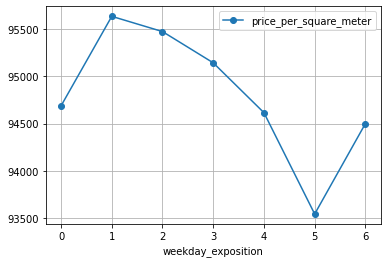

In [36]:
data.pivot_table(index = 'weekday_exposition',
                 values = 'price_per_square_meter',
                 aggfunc = ['median']).plot(y = 'median', style = '-o', grid = True)

Вывод: разброс мы видим совсем незначительный, но дороже всего квартиры, выставленные во вторник, а к выходным, к субботе в частности, цены ниже. С чем это связано сказать трудно, но предположу, что во время выходных люди расслабленнее и менее активны, отчего выставляют недвижимость чуть-чуть дешевле.

<AxesSubplot:xlabel='month_exposition'>

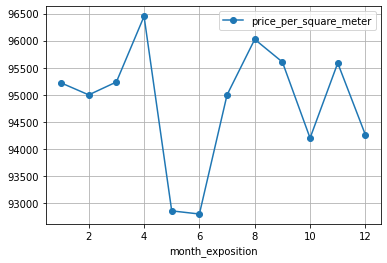

In [37]:
data.pivot_table(index = 'month_exposition',
                 values = 'price_per_square_meter',
                 aggfunc = ['median']).plot(y = 'median', style = '-o', grid = True)

Вывод: данный график практически полностью соответствуют параметру, который был выше, отображающему скачок продаж зимой. Летом недвижимость дешевле всего.

<AxesSubplot:xlabel='year_exposition'>

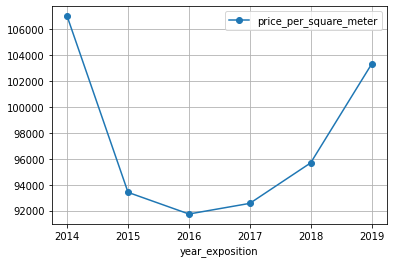

In [38]:
data.pivot_table(index = 'year_exposition',
                 values = 'price_per_square_meter',
                 aggfunc = ['median']).plot(y = 'median', style = '-o', grid = True)

Вывод: нужно проводить отдельный анализ, описывающий, почему рынок недвижимости упал к 2015 году, но, немного поискав информацию в интернете, я наткнулся на новости о том, что в эти годы "пугали отменой льготной ипотеки и страхами дальнейшего обесценения рубля" и "скидки от застройщиков, необходимые для оживления спроса, достигли 20-25%".
Утверждать о достоверности не могу, но похоже на правду, если сравнивать с нашим графиком.

### Считаем среднюю цену одного квадратного метра в топ-10 населенных пунктов.

In [39]:
top_10 = data.pivot_table(index='locality_name',
                          values=['last_price', 'total_area'],
                          aggfunc=['sum', 'count'])
top_10.columns = ['last_price_sum', 'total_area_sum', 'last_price_count', 'total_area_count']

top_10['price_per_square_meter'] = top_10['last_price_sum'] / top_10['total_area_sum']
top_10.sort_values('price_per_square_meter', ascending=False).head(10)

,last_price_sum,total_area_sum,last_price_count,total_area_count,price_per_square_meter
locality_name,,,,,
Санкт-Петербург,1.267507e+11,1017958.15,15721,15721,124514.621378
Зеленогорск,1.509201e+08,1307.70,24,24,115408.809360
поселок Репино,4.866742e+07,431.70,4,4,112734.343294
Пушкин,2.387074e+09,22712.98,369,369,105097.361245
поселок Лисий Нос,1.240500e+07,120.20,3,3,103202.995008
Сестрорецк,1.160535e+09,11596.16,183,183,100079.262445
Кудрово,7.912875e+08,7973.68,173,173,99237.433657
деревня Мистолово,5.247125e+07,528.88,11,11,99212.014067
поселок Левашово,4.200000e+06,43.30,1,1,96997.690531


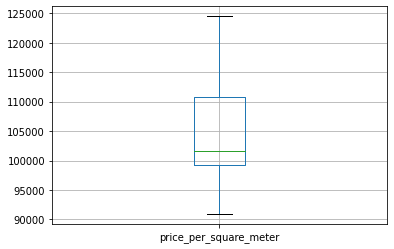

In [40]:
top_10.sort_values('price_per_square_meter', ascending=False).head(10).boxplot('price_per_square_meter')
None

Судя по ящику с усами медиана располагается чуть выше 100 тысяч, а межквартильный диапазон составляет ~18 000

In [41]:
top_10.sort_values('price_per_square_meter', ascending=False).head(10).describe()

,last_price_sum,total_area_sum,last_price_count,total_area_count,price_per_square_meter
count,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000
mean,1.326242e+10,1.076598e+05,1678.800000,1678.800000,104740.142620
std,3.988332e+10,3.199379e+05,4935.763474,4935.763474,10026.851067
min,4.200000e+06,4.330000e+01,1.000000,1.000000,90916.895213
25%,4.961837e+07,4.559950e+02,5.750000,5.750000,99218.368965
50%,4.711038e+08,4.640690e+03,98.500000,98.500000,101641.128727
75%,1.239644e+09,1.334275e+04,270.000000,270.000000,110825.097782
max,1.267507e+11,1.017958e+06,15721.000000,15721.000000,124514.621378


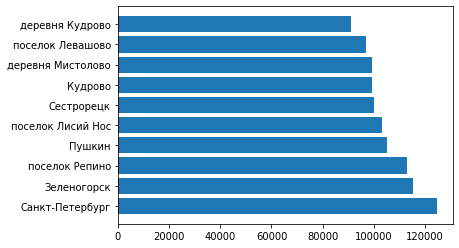

In [42]:
index = top_10.sort_values('price_per_square_meter', ascending=False).head(10).index
values = top_10.sort_values('price_per_square_meter', ascending=False).head(10)['price_per_square_meter']

plt.barh(index, values)
None

Вывод: самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Гатчине.

In [43]:
top_10.sort_values('last_price_sum', ascending=False).tail(10)

,last_price_sum,total_area_sum,last_price_count,total_area_count,price_per_square_meter
locality_name,,,,,
деревня Пустынка,850000.0,31.1,1,1,27331.189711
деревня Малая Романовка,850000.0,66.8,1,1,12724.550898
поселок Почап,850000.0,53.0,1,1,16037.735849
поселок Володарское,799000.0,47.2,1,1,16927.966102
деревня Ялгино,777000.0,44.0,1,1,17659.090909
поселок Тесово-4,750000.0,58.0,1,1,12931.034483
поселок городского типа Кондратьево,750000.0,30.0,1,1,25000.000000
поселок Цвылево,650000.0,34.0,1,1,19117.647059
деревня Чудской Бор,500000.0,30.7,1,1,16286.644951


Вывод: а вот вообще самое дешевое жилье находится в деревне Вахновая Кара, где за один квадратный метр необходимо заплатить всего лишь 11.7 тысяч. Но и объявление о продаже там всего одно.

### Средняя цена каждого километра в Санкт-Петербурге

<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='mean_price_for_km'>

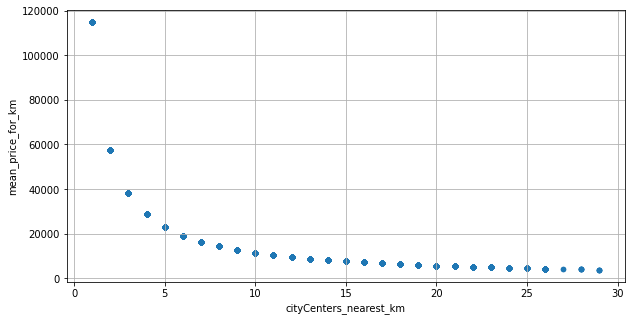

In [44]:
data[data['locality_name'] == 'Санкт-Петербург']['last_price'].sort_values()
# Отсортировав таблицу под нужные нам параметры, обнаруживаем объект ценой в 12190
# Предположим, что в данных была допущена ошибка при их вводе, т.к., мне кажется, что столь маленькая цена для
# Санкт-Петербурга вряд ли будет реальна
# Ближайшая цена 1 190 000. Скорее всего в 12190 пропустили два ноля.
data.loc[data['last_price'] == 12190, 'last_price'] = 1219000

spb = data.query('locality_name == "Санкт-Петербург"') # Фильтруем объекты только по Санкт-Петербургу
spb = spb.dropna(subset = ['cityCenters_nearest'], inplace = False) # Убираем пропуски
spb['cityCenters_nearest_km'] = spb['cityCenters_nearest_km'].round() # Выполняем округление
spb_mean_price_per_meter = spb['price_per_square_meter'].mean() # Считаем среднюю цену за кв.м
spb['mean_price_for_km'] = spb_mean_price_per_meter / spb['cityCenters_nearest_km'] # Средняя цена для каждого км.
spb.plot(x='cityCenters_nearest_km', y='mean_price_for_km', kind='scatter', figsize=(10, 5), grid=True)
#Строим график

Вывод: Цена не сильно варьируется при сильном удалении от центра, совсем чуть-чуть увеличиваясь при приближении.
А вот в совсем близком к центру в радиусе в пять км. скачком поднимается вверх. Недвижимость непосредственно в центре самая дорогая. Это логичный факт.

## Общий вывод

Мы выполнили предобработку данных и изучили их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

На основании выполненного проекта было выяснено:

По сроку продажи:
* В основном недвижимость сдается в интервале до `200 дней`. При этом продажа до `45 дней` считается быстрой, а свыше `550 дней` сверхдолгой.
* Имеются аномальные пики продаж на отметках в `45`, `60` и `90 дней`.
    
По влиянию параметров на стоимость объекта:
* С увеличением общей площади стоимость растет совсем незначительно. Коэффициент корреляции всего `0.3`. Ровно как и с ростом жилой площади, и площади кухни.
* Основная часть недвижимости имеет от 1 до 3 комнат. При этом 3 комнатные квартиры дешевле.
* Квартиры на первом этаже в среднем дешевле на 10%, чем на последнем.
* Недвижимость, выставленная на продажу во вторник дороже выставленной в субботу, хоть и незначительно.
* Зимой недвижимость продают чаще и дороже, чем летом
* C 2015 по 2018 года был обвал цен на недвижимость примерно `на 20%`, но сейчас цены постепенно приходят в норму.

Цена за квадратный метр в топ-10 городах:
* Самый дорогой город - `Санкт-Петербург` с ценой в `124 500` за кв.м.
* Остальные места занимают пригородные населенные пункты Санкт-Петербурга
* В среднем мы имеем цену в `100 000` за кв.м., а диапазон разброса от `91` до `124.5` тысяч за кв.м.

Цена не сильно варьируется при сильном удалении от центра Санкт-Петербурга. Разкий скачок вверх происходит только в 5 километровом радиусе непосредственной близости к нему.

Типичная квартира имеет параметры:
* Общая площадь от `30` до `75 кв.м.`, жилая от `18` до `42`, кухня от `7` до `12`.
* Количество комнат от `1` до `3`.
* Высота потолков `2.7`
* Количество этажей в доме от `1` до `5`.
* Удалена от центра на `15` километров, а от аэропорта на `25-30`.
* Имеет парк в пешей доступности.